In [57]:
import pickle 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

df_scaled = pd.read_csv("D:\Projects\Stock_analysis\data\scaled_data.csv")

with open("Scaled.pkl", "rb") as f:
    scaler=pickle.load(f)

<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
C:\Users\KUNAL\AppData\Local\Temp\ipykernel_13812\193370531.py:9: SyntaxWarning: invalid escape sequence '\P'
  df_scaled = pd.read_csv("D:\Projects\Stock_analysis\data\scaled_data.csv")


In [58]:
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

we cant use train_test_split because time series data is seqential data and train_test_split spread randomly data 

In [63]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data.iloc[i-time_step:i, 0].values)  # Close column values
        y.append(data.iloc[i, 0])
    return np.array(X), np.array(y)

In [64]:
time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test   = create_dataset(test, time_step)


In [65]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)

In [66]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

d:\Projects\Stock_analysis\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0030
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.6227e-04
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.7236e-04
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.5750e-04
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.4948e-04
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.7487e-04
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.5399e-04
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.5601e-04
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.2833e-04
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.3577e-04
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.5422e-04
Epoch 12/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.2671e-04
Epoch 13/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.5017e-04
Epoch 14/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.0374e-04
Epoch 15/20
87/87 ━

In [68]:
predictions = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [75]:
predictions

array([[0.41440538],
       [0.41534492],
       [0.4160412 ],
       [0.4169959 ],
       [0.4190852 ],
       [0.42123538],
       [0.4234104 ],
       [0.42594457],
       [0.42789456],
       [0.42999285],
       [0.43249768],
       [0.4348211 ],
       [0.43669218],
       [0.4379907 ],
       [0.43941474],
       [0.4412583 ],
       [0.44332784],
       [0.4454019 ],
       [0.44822043],
       [0.45183808],
       [0.45640618],
       [0.46048304],
       [0.46455985],
       [0.4679034 ],
       [0.4708806 ],
       [0.47454888],
       [0.4778492 ],
       [0.4798249 ],
       [0.47942433],
       [0.47913492],
       [0.4785095 ],
       [0.47827968],
       [0.47889417],
       [0.4800382 ],
       [0.48055443],
       [0.48007798],
       [0.47937104],
       [0.47865707],
       [0.47788545],
       [0.4778494 ],
       [0.478044  ],
       [0.47842136],
       [0.47861713],
       [0.47869962],
       [0.47853503],
       [0.4783583 ],
       [0.47929248],
       [0.480

In [77]:
actual

array([[0.43841982],
       [0.43478806],
       [0.4392032 ],
       [0.45034787],
       [0.44735687],
       [0.44917274],
       [0.45501209],
       [0.45027662],
       [0.45682818],
       [0.46280997],
       [0.46181302],
       [0.46078039],
       [0.45971203],
       [0.4656583 ],
       [0.47117732],
       [0.47342032],
       [0.47452442],
       [0.4841022 ],
       [0.49143704],
       [0.50051665],
       [0.49578098],
       [0.50243923],
       [0.50026732],
       [0.50432646],
       [0.51682421],
       [0.51443848],
       [0.50699682],
       [0.49296817],
       [0.50614239],
       [0.50347186],
       [0.50845681],
       [0.51472333],
       [0.51625452],
       [0.50834987],
       [0.50197647],
       [0.50432646],
       [0.5051097 ],
       [0.50389916],
       [0.5104507 ],
       [0.50899094],
       [0.5093825 ],
       [0.50688622],
       [0.50670797],
       [0.50496069],
       [0.50588777],
       [0.51669271],
       [0.51744149],
       [0.524

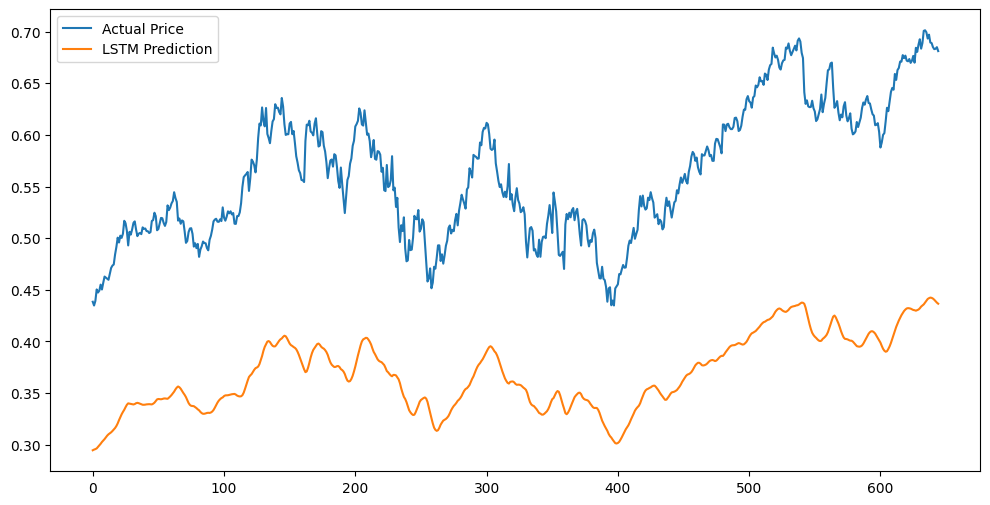

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual Price")
plt.plot(predictions, label="LSTM Prediction")
plt.legend()
plt.show()